In [1]:
# Setup

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('dark_background')

In [2]:
# Question 1 part (a)

# Setup
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

classification_rate = lambda x: np.trace(x) / np.sum(x)

filename = 'wine.csv'

data = np.genfromtxt(filename, delimiter=',')
# The first element is nan for an unknown reason
data[0, 0] = 14.23

X = data[:, :-1]
y = data[:, -1]

print(f'{X.shape = }')
print(f'{y.shape = }')

X.shape = (178, 13)
y.shape = (178,)


In [3]:
# Question 1 part (a) continued

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'{X_train.shape = }')
print(f'{y_train.shape = }')
print(f'{X_test.shape = }')
print(f'{y_test.shape = }')

X_train.shape = (142, 13)
y_train.shape = (142,)
X_test.shape = (36, 13)
y_test.shape = (36,)


In [4]:
# Question 1 part (a) continued
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
correct = classification_rate(cm)
print(f'Confusion Matrix =\n{cm}')
print(f'Classification Rate = {correct:.3f}')

Confusion Matrix =
[[14  0  0]
 [ 0  9  0]
 [ 0  0 13]]
Classification Rate = 1.000


In [5]:
# Question 1 part (b)

# Setup
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
correct = classification_rate(cm)
print(f'Confusion Matrix =\n{cm}')
print(f'Classification Rate = {correct:.3f}')

Confusion Matrix =
[[14  0  0]
 [ 0  7  2]
 [ 0  2 11]]
Classification Rate = 0.889


In [6]:
# Question 2 part (a)

# Setup
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

filename = 'reg_train.csv'
data = np.genfromtxt(filename, delimiter=',')
X_train = data[:, 0:1]
y_train = data[:, -1]

filename = 'reg_train.csv'
data = np.genfromtxt(filename, delimiter=',')
X_test = data[:, 0:1]
y_test = data[:, -1]

def get_pf(n: int) -> PolynomialFeatures:
    return PolynomialFeatures(degree=n, include_bias=False)

print(f'{X_train.shape = }')
print(f'{y_train.shape = }')
print(f'{X_test.shape = }')
print(f'{y_test.shape = }')

X_train.shape = (40, 1)
y_train.shape = (40,)
X_test.shape = (40, 1)
y_test.shape = (40,)


In [7]:
# Question 2 part (a) continued

scores = []

for i in range(2, 11):
    pf = get_pf(i)
    X = pf.fit_transform(X_train)
    _X = pf.transform(X_test)
    model = LinearRegression()
    model.fit(X, y_train)
    acc = model.score(_X, y_test)
    scores.append((i, acc))

deg, best = max(scores, key=lambda x: x[1])
print(f'Best Accuracy achieved: {best:.3f} at degree {deg}')

Best Accuracy achieved: 0.803 at degree 10


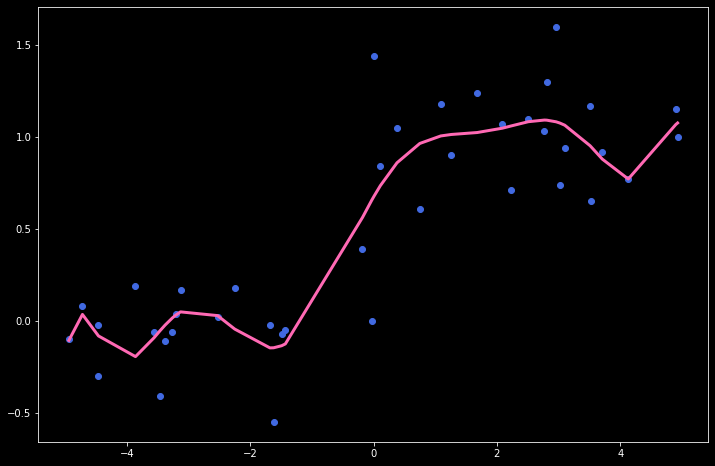

In [8]:
# Question 2 part (a) continued

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

pf = get_pf(deg)
train_polynomial = pf.fit_transform(X_train)
test_polynomial = pf.transform(X_test)

model = LinearRegression()
model.fit(train_polynomial, y_train)

y_pred = model.predict(test_polynomial)

indices = np.argsort(X_test.flatten())
test_polynomial = X_test[indices]
y_pred = y_pred[indices]

ax.scatter(X_test, y_test, c='royalblue')
ax.plot(test_polynomial, y_pred, c='hotpink', linewidth=3)

plt.show()

In [9]:
# Question 2 part (b)

model = LinearRegression()
model.fit(X_train, y_train)

r2_value = model.score(X_test, y_test)

print(f'R2 Value = {r2_value:.3f}')

R2 Value = 0.661


In [10]:
# Question 3

# Setup
from sklearn.linear_model import LogisticRegression

filename = 'RE_LR_data.csv'
data = np.genfromtxt(filename, delimiter=',')

X = data[:, :-1]
# Again, numpy cannot read the first value for some reason
X[0,0] = 1.71
y = data[:, -1]

print(f'{X.shape = }')
print(f'{y.shape = }')

X.shape = (137, 4)
y.shape = (137,)


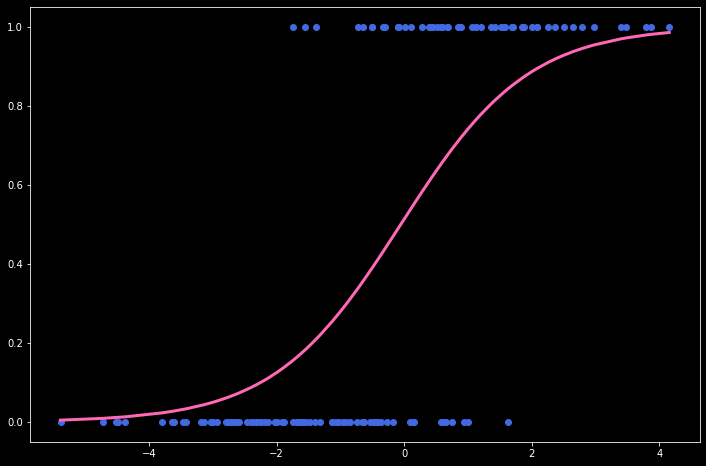

In [11]:
# Question 3 continued

model = LogisticRegression()
model.fit(X, y)

coefs = model.coef_
xa = np.sum(X * coefs, axis=1)
indices = np.argsort(xa.flatten())
xa = xa[indices]
Y = y[indices]

y_pred = model.predict_proba(X)[:, 1]
y_pred = y_pred[indices]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(xa, Y, c='royalblue')
ax.plot(xa, y_pred, c='hotpink', linewidth=3)

plt.show()